### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [403]:
### Data Collection
import pandas_datareader as pdr
key=""

### READ THE DATASET

In [19]:
import pandas as pd

In [20]:
df=pd.read_csv(r"D:\m.sc Data science\data set\stock market datasets\AMZN.csv")

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [22]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.000000,2136400
1253,2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300
1254,2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400
1255,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600
1256,2019-12-30,1874.000000,1884.000000,1840.619995,1846.890015,1846.890015,3674700


In [23]:
df1=df.reset_index()['Close']

In [24]:
df1

0        308.519989
1        302.190002
2        295.290009
3        298.420013
4        300.459991
           ...     
1252    1793.000000
1253    1789.209961
1254    1868.770020
1255    1869.800049
1256    1846.890015
Name: Close, Length: 1257, dtype: float64

### PLOT THE CLOSE INDEX

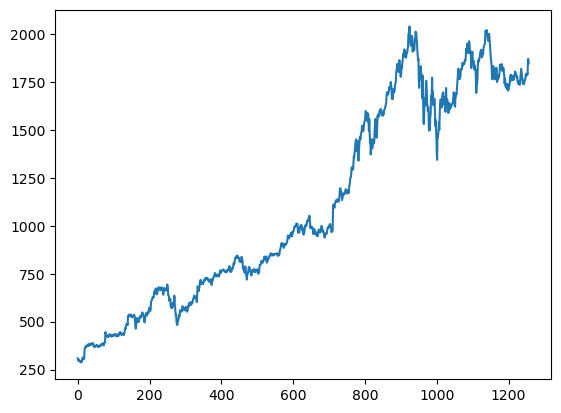

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [26]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [27]:
import numpy as np

In [28]:
df1

0        308.519989
1        302.190002
2        295.290009
3        298.420013
4        300.459991
           ...     
1252    1793.000000
1253    1789.209961
1254    1868.770020
1255    1869.800049
1256    1846.890015
Name: Close, Length: 1257, dtype: float64

### PREPROCESSING THE DATSET

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
print(df1)

[[-0.97538461]
 [-0.98260831]
 [-0.9904825 ]
 ...
 [ 0.80515362]
 [ 0.80632907]
 [ 0.78018442]]


### SPLIT THE DATASET

In [32]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [33]:
training_size,test_size

(817, 440)

In [34]:
train_data

array([[-0.97538461],
       [-0.98260831],
       [-0.9904825 ],
       [-0.98691058],
       [-0.98458258],
       [-0.98861097],
       [-0.99491031],
       [-0.99111017],
       [-0.99278772],
       [-1.        ],
       [-0.99567492],
       [-0.99715845],
       [-0.98824578],
       [-0.97333045],
       [-0.97096818],
       [-0.97408364],
       [-0.9774045 ],
       [-0.98064546],
       [-0.97166432],
       [-0.92287855],
       [-0.91153514],
       [-0.91258505],
       [-0.91121561],
       [-0.90078513],
       [-0.90034009],
       [-0.90458531],
       [-0.90180081],
       [-0.89935865],
       [-0.89704204],
       [-0.89172413],
       [-0.89902773],
       [-0.90137857],
       [-0.89495368],
       [-0.88963574],
       [-0.89365271],
       [-0.89542157],
       [-0.88768432],
       [-0.88833481],
       [-0.8936299 ],
       [-0.88735337],
       [-0.88855164],
       [-0.89070846],
       [-0.88487701],
       [-0.89370979],
       [-0.89545581],
       [-0

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### CREATE THE MODEL USING LAYERS

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### FIT THE MODEL

In [44]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 16s 612ms/step - loss: 0.0752 - val_loss: 0.1504
Epoch 2/100
12/12 [==============================] - 5s 423ms/step - loss: 0.0143 - val_loss: 0.0391
Epoch 3/100
12/12 [==============================] - 4s 352ms/step - loss: 0.0041 - val_loss: 0.0129
Epoch 4/100
12/12 [==============================] - 4s 365ms/step - loss: 0.0022 - val_loss: 0.0097
Epoch 5/100
12/12 [==============================] - 4s 378ms/step - loss: 0.0020 - val_loss: 0.0112
Epoch 6/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0018 - val_loss: 0.0111
Epoch 7/100
12/12 [==============================] - 4s 364ms/step - loss: 0.0017 - val_loss: 0.0108
Epoch 8/100
12/12 [==============================] - 5s 381ms/step - loss: 0.0016 - val_loss: 0.0098
Epoch 9/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0016 - val_loss: 0.0105
Epoch 10/100
12/12 [==============================] - 5s 396ms/step - loss: 0.0016 - val_l

12/12 [==============================] - 4s 356ms/step - loss: 9.5028e-04 - val_loss: 0.0136
Epoch 82/100
12/12 [==============================] - 4s 361ms/step - loss: 9.6911e-04 - val_loss: 0.0125
Epoch 83/100
12/12 [==============================] - 5s 370ms/step - loss: 9.7614e-04 - val_loss: 0.0149
Epoch 84/100
12/12 [==============================] - 4s 370ms/step - loss: 9.3130e-04 - val_loss: 0.0170
Epoch 85/100
12/12 [==============================] - 4s 360ms/step - loss: 8.6627e-04 - val_loss: 0.0156
Epoch 86/100
12/12 [==============================] - 4s 358ms/step - loss: 8.5308e-04 - val_loss: 0.0148
Epoch 87/100
12/12 [==============================] - 4s 367ms/step - loss: 9.3867e-04 - val_loss: 0.0135
Epoch 88/100
12/12 [==============================] - 4s 349ms/step - loss: 8.7777e-04 - val_loss: 0.0166
Epoch 89/100
12/12 [==============================] - 4s 364ms/step - loss: 8.5212e-04 - val_loss: 0.0158
Epoch 90/100
12/12 [==============================] - 4s 34

In [37]:
import tensorflow as tf

In [39]:
tf.__version__

'2.1.0'

In [45]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 52ms/step


In [46]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### CALCULATE THE MEAN SQUARED ERROR

In [47]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

866.1477214035598

### CALCULATE THE ROOTMEAN SQUARED ERROR

In [48]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1662.0877882466116

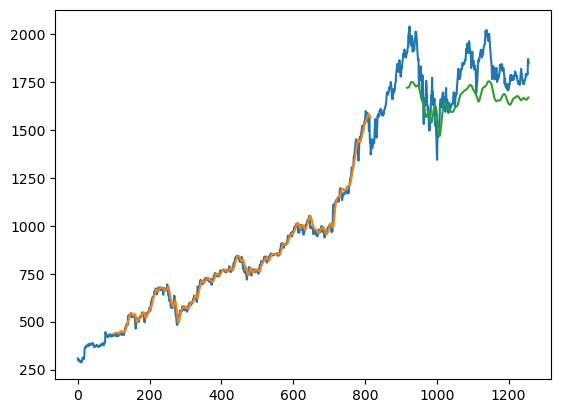

In [49]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
len(test_data)

440

In [51]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[0.735324263631858,
 0.7094650496524686,
 0.7544505817255338,
 0.6844044719546316,
 0.6994225415385751,
 0.7181950240998254,
 0.7450700515190007,
 0.7282489555030915,
 0.753537714832631,
 0.7319920844159311,
 0.6691810661765432,
 0.6911489303546228,
 0.683114924091746,
 0.6858766486578225,
 0.7111539846979893,
 0.699616593668253,
 0.7150796043674164,
 0.7273816414015859,
 0.7731432427684566,
 0.7649153236008073,
 0.7624503192614807,
 0.7501255748734716,
 0.7529100056522005,
 0.7763728931122165,
 0.7715683979681933,
 0.7356209838586079,
 0.752407950372493,
 0.7465992043029619,
 0.7512096473173071,
 0.7200096130460696,
 0.7098987067032212,
 0.6600401408910854,
 0.6905326444635649,
 0.6580202168918843,
 0.6415985080586097,
 0.6535354266370743,
 0.653238706410324,
 0.6276532268540345,
 0.6404231908070745,
 0.6578034574083667,
 0.6498265664511647,
 0.6188432916634448,
 0.6376500429516252,
 0.6356758109687266,
 0.6489820989284043,
 0.6541288670905747,
 0.6894485720197294,
 0.7009175648205113

In [57]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 99 into shape (1,100,1)

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1257

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1257:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

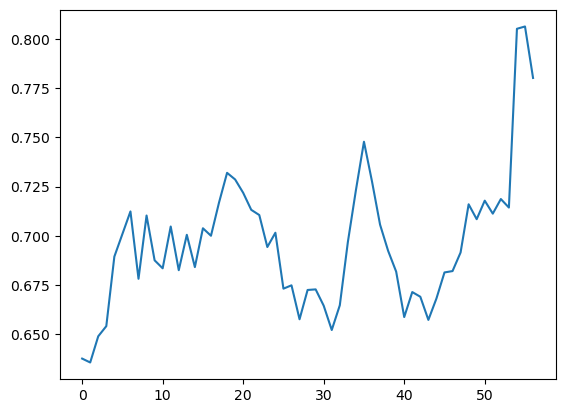

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()

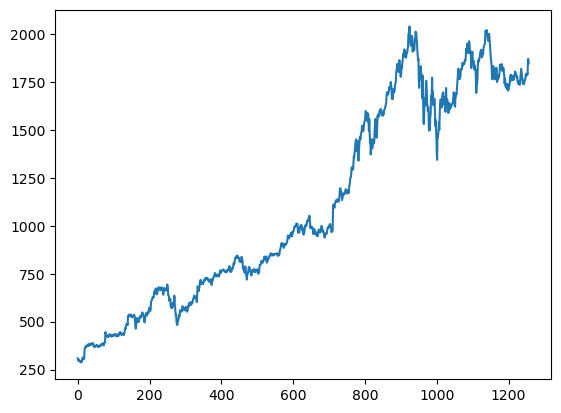

In [69]:
plt.plot(df3)